# Ground Truth
### Preparation of the Data:
- Firstly we grouped the data with respect to each unique Account ID.
- Now we made two targets w.r.t the Data.
    - 1 Rule: The person had only single orders from all years(If Yes: Churn and if No: Willnot Churn)
    - 2 Rule: Checking the Average Purchase Cycle of the customer and deciding whether Churn or not.
    - Customers who has purchased in 2021 were labelled as WillNot Churn.
- The **Final Churn Target** Variable was the Combination of Rule1, Rule2.

### Inferences from EDA:
- *Single_Order* Variable was able to classify **30%** of the whole data according to the final target.
- About **93% people Will Not Churn** who made transactions only in **year 2021**.
- About **93% people will Churn** who made transactions only in **year 2020**.
- **Churn_Rule_avg_cycle** feature was able to classify **82% of the people who were not churning**.

# Hypothesis Important or Result Validations

- All most all models have reached a score of **94% Accuracy** by just choosing **4 common columns** and they are:[*'Single_Order','2021','2020','Churn_Rule_avg_cycle'*].
- From the Above EDA inferences we see these were the most important features and are same to what model have selected.


# Training Methodology

1. We Firstly Split the data into the whole **Training and Testing samples**.
2. Now we will build a **Base line model (Model with default parameter setting**) using these features by applying a **5-fold Cross validation split on the Training set**.
3. We will then use **Hypothesis Testing(ANOVA) Testing** to select best features for our model by **Recursively iterating through the ranked features** and will stop the iteration as we get to a highest best score.
4. Then we will **Tune those models with best features selected**.

# Target Dsitribution of Training and Testing Samples

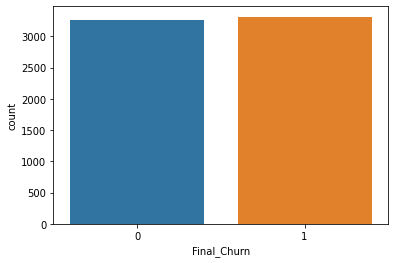

In [74]:
# Countplot of Y train
sns.countplot(train_y);

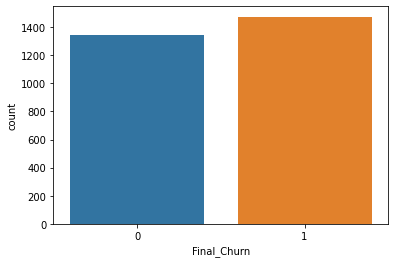

In [75]:
# Countplot of Y test
sns.countplot(test_y);

- **Distribution of Median days:**

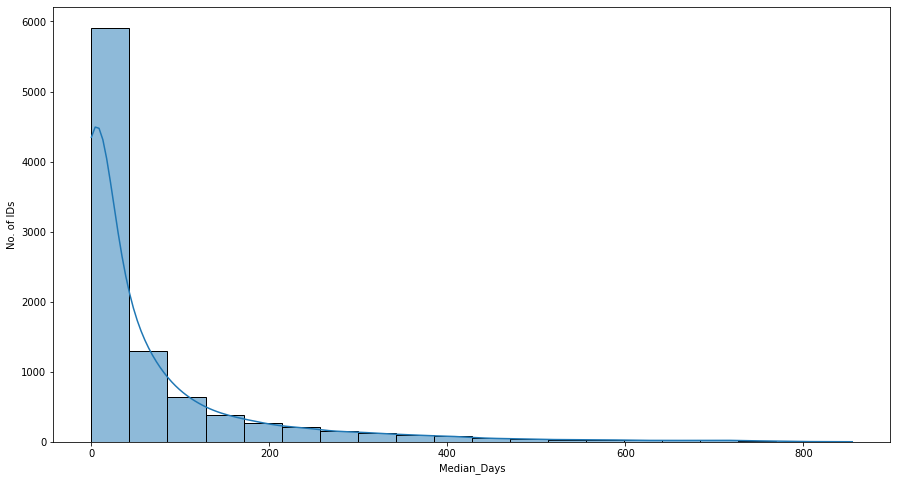

In [247]:
fig = plt.figure(figsize=(15,8))
sns.histplot(x='Median_Days', data=data, bins=20, palette='Set1', kde=True);
plt.ylabel('No. of IDs');

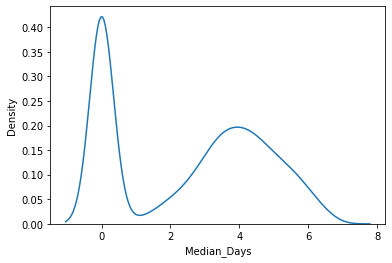

In [320]:
sns.kdeplot(np.log(data['Median_Days']+1));

In [338]:

# Uniform distribution if not forming then mistake in logic 


# Importing and Installing all packages

In [1]:
# DATA ANALYSIS.
import numpy as np
import pandas as pd


# DATA VISUALIZATION.
import matplotlib.pyplot as plt
import seaborn as sns


# MODELLING
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier


# DATA VALIDATION AND METRIC.
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, KFold
from sklearn.metrics import recall_score, roc_auc_score, make_scorer, roc_curve, accuracy_score, plot_confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest,chi2,f_regression, f_classif
from sklearn.decomposition import PCA
from sklearn.calibration import calibration_curve



# HIDING AND MAGIC COMMANDS
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

# Data Preprocessing

In [2]:
data = pd.read_csv('EDA_data.csv')

In [4]:
data.head()

,accountsapid,Single_Order,2019,2020,2021,Churn_Rule_year_wise,Churn_Rule_avg_cycle,Median_Days,3_years_cycle,Final_Churn,...,OrderChannel_NonDigital,OrderChannel_EProcurement,OrderChannel_ECommerce,Recency,Frequency,Monetary,RFM_Score,CountryCode,Average_years_taken_per order,Orders year wise
0,17876.0,No,Yes,No,No,Will_Churn,Will_Churn,73.0,219.0,Will_Churn,...,Yes,No,No,664.0,3.0,625.00,10,US,3.0,Orders only in 2019
1,17882.0,No,Yes,Yes,Yes,WillNot_Churn,WillNot_Churn,20.0,60.0,WillNot_Churn,...,Yes,No,No,881.0,93.0,41278.00,6,US,1.0,Orders in all years
2,17985.0,No,Yes,Yes,Yes,WillNot_Churn,WillNot_Churn,174.0,522.0,WillNot_Churn,...,Yes,Yes,No,872.0,52.0,11097.00,6,US,1.0,Orders in all years
3,22286.0,No,Yes,Yes,Yes,WillNot_Churn,WillNot_Churn,21.0,63.0,WillNot_Churn,...,Yes,No,Yes,893.0,87.0,29191.16,6,CA,1.0,Orders in all years
4,19780.0,No,Yes,Yes,Yes,WillNot_Churn,WillNot_Churn,42.0,126.0,WillNot_Churn,...,Yes,No,No,850.0,34.0,22553.85,6,US,1.0,Orders in all years


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9396 entries, 0 to 9395
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   accountsapid                   9396 non-null   float64
 1   Single_Order                   9396 non-null   object 
 2   2019                           9396 non-null   object 
 3   2020                           9396 non-null   object 
 4   2021                           9396 non-null   object 
 5   Churn_Rule_year_wise           9396 non-null   object 
 6   Churn_Rule_avg_cycle           9396 non-null   object 
 7   Median_Days                    9396 non-null   float64
 8   3_years_cycle                  9396 non-null   float64
 9   Final_Churn                    9396 non-null   object 
 10  TotalOrderNumber               9396 non-null   float64
 11  FirstOrderedDate               9396 non-null   object 
 12  LastOrderedDate                9396 non-null   o

### Handling Date Column

In [3]:
## Handling dates
def handle_dates(dataframe_in, date_column, date_format):
    
    '''
    Description: Converts a Date Column to a Standard Pandas Date Format.

    Aurguments:
    dataframe_in = Dataframe.
    date_column = Name of the Date Column.
    date_format = Format of a date Ex:  
    todays_date = tuple containing year, month, day in order
    '''
    dataframe = dataframe_in.copy()
    dataframe[date_column] = pd.to_datetime(dataframe[date_column], format=date_format)
    dataframe[date_column+'_Year'] = dataframe[date_column].dt.year
    dataframe[date_column+'_Month'] = dataframe[date_column].dt.month
    dataframe[date_column+'_Week'] = dataframe[date_column].dt.week
    dataframe[date_column+'_Day'] = dataframe[date_column].dt.day
    dataframe[date_column+'_Dayofweek'] = dataframe[date_column].dt.dayofweek
    #today_date = pd.to_datetime(dt.date(todays_date[0],todays_date[1],todays_date[2]))
    #dataframe[date_column+'_Recency'] = dataframe[date_column].apply(lambda x : (today_date - x).days)
    return dataframe

In [4]:
new_data=handle_dates(data, 'FirstOrderedDate', '%Y-%m-%d')
data=handle_dates(new_data, 'LastOrderedDate', '%Y-%m-%d')
data.drop(['FirstOrderedDate','LastOrderedDate'], axis=1, inplace=True)

In [7]:
data.head()

,accountsapid,Single_Order,2019,2020,2021,Churn_Rule_year_wise,Churn_Rule_avg_cycle,Median_Days,3_years_cycle,Final_Churn,...,FirstOrderedDate_Year,FirstOrderedDate_Month,FirstOrderedDate_Week,FirstOrderedDate_Day,FirstOrderedDate_Dayofweek,LastOrderedDate_Year,LastOrderedDate_Month,LastOrderedDate_Week,LastOrderedDate_Day,LastOrderedDate_Dayofweek
0,17876.0,No,Yes,No,No,Will_Churn,Will_Churn,73.0,219.0,Will_Churn,...,2019,9,36,3,1,2019,11,46,15,4
1,17882.0,No,Yes,Yes,Yes,WillNot_Churn,WillNot_Churn,20.0,60.0,WillNot_Churn,...,2019,1,5,29,1,2021,6,22,4,4
2,17985.0,No,Yes,Yes,Yes,WillNot_Churn,WillNot_Churn,174.0,522.0,WillNot_Churn,...,2019,2,6,7,3,2021,6,24,18,4
3,22286.0,No,Yes,Yes,Yes,WillNot_Churn,WillNot_Churn,21.0,63.0,WillNot_Churn,...,2019,1,3,17,3,2021,5,20,20,3
4,19780.0,No,Yes,Yes,Yes,WillNot_Churn,WillNot_Churn,42.0,126.0,WillNot_Churn,...,2019,3,9,1,4,2021,3,13,31,2


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9396 entries, 0 to 9395
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   accountsapid                   9396 non-null   float64
 1   Single_Order                   9396 non-null   object 
 2   2019                           9396 non-null   object 
 3   2020                           9396 non-null   object 
 4   2021                           9396 non-null   object 
 5   Churn_Rule_year_wise           9396 non-null   object 
 6   Churn_Rule_avg_cycle           9396 non-null   object 
 7   Median_Days                    9396 non-null   float64
 8   3_years_cycle                  9396 non-null   float64
 9   Final_Churn                    9396 non-null   object 
 10  TotalOrderNumber               9396 non-null   float64
 11  NumQtrsPerOrder                9396 non-null   float64
 12  OrderChannel_NonDigital        9396 non-null   o

### Handling Categorical Data

In [11]:
def All_Label_Encoder(dataframe, how):
    
    
    '''
    Description : This is a Label Encoding Custom Function which makes changes into the dataframe directly.

    Arguments:
    dataframe = Dataframe to be encoded.
    how = A string which indicates the method of encoding , {'numerical', 'probability'}
    '''
    def Label_mapper(name,df,how):

        if how=='numerical':
            sam_dict={}
            num=0
            for loc in sorted(df[name].unique()):
                sam_dict.update([(loc,num)])
                num=num+1
            print(sam_dict)
            df[name]=df[name].map(sam_dict)

        elif how=='probability':
            unique_names=[]
            for ind in df[name].value_counts().index:
                unique_names.append(ind)
            unique_values=[]
            for val in df[name].value_counts():
                unique_values.append(val)
            total_sum=sum(unique_values)
            new_unique_values = []
            for vals in unique_values:
                new_unique_values.append(vals/total_sum)
            proba_dict = {unique_names[i]: new_unique_values[i] for i in range(len(unique_names))}
            df[name]=df[name].map(proba_dict)

    for columns in dataframe.select_dtypes(include=['object']).columns:
        print(columns)
        Label_mapper(columns,dataframe,how)

In [12]:
All_Label_Encoder(data, 'numerical')

Single_Order
{'No': 0, 'Yes': 1}
2019
{'No': 0, 'Yes': 1}
2020
{'No': 0, 'Yes': 1}
2021
{'No': 0, 'Yes': 1}
Churn_Rule_year_wise
{'WillNot_Churn': 0, 'Will_Churn': 1}
Churn_Rule_avg_cycle
{'Single order throughout': 0, 'WillNot_Churn': 1, 'Will_Churn': 2}
Final_Churn
{'WillNot_Churn': 0, 'Will_Churn': 1}
OrderChannel_NonDigital
{'No': 0, 'Yes': 1}
OrderChannel_EProcurement
{'No': 0, 'Yes': 1}
OrderChannel_ECommerce
{'No': 0, 'Yes': 1}
CountryCode
{'CA': 0, 'PR': 1, 'US': 2}
Orders year wise
{'Orders in 2019,2020': 0, 'Orders in 2019,2021': 1, 'Orders in 2020,2021': 2, 'Orders in all years': 3, 'Orders only in 2019': 4, 'Orders only in 2020': 5, 'Orders only in 2021': 6}


In [65]:
data.head()

,accountsapid,Single_Order,2019,2020,2021,Churn_Rule_year_wise,Churn_Rule_avg_cycle,Median_Days,3_years_cycle,Final_Churn,...,FirstOrderedDate_Year,FirstOrderedDate_Month,FirstOrderedDate_Week,FirstOrderedDate_Day,FirstOrderedDate_Dayofweek,LastOrderedDate_Year,LastOrderedDate_Month,LastOrderedDate_Week,LastOrderedDate_Day,LastOrderedDate_Dayofweek
0,17876.0,0,1,0,0,1,2,73.0,219.0,1,...,2019,9,36,3,1,2019,11,46,15,4
1,17882.0,0,1,1,1,0,1,20.0,60.0,0,...,2019,1,5,29,1,2021,6,22,4,4
2,17985.0,0,1,1,1,0,1,174.0,522.0,0,...,2019,2,6,7,3,2021,6,24,18,4
3,22286.0,0,1,1,1,0,1,21.0,63.0,0,...,2019,1,3,17,3,2021,5,20,20,3
4,19780.0,0,1,1,1,0,1,42.0,126.0,0,...,2019,3,9,1,4,2021,3,13,31,2


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9396 entries, 0 to 9395
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   accountsapid                   9396 non-null   float64
 1   Single_Order                   9396 non-null   int64  
 2   2019                           9396 non-null   int64  
 3   2020                           9396 non-null   int64  
 4   2021                           9396 non-null   int64  
 5   Churn_Rule_year_wise           9396 non-null   int64  
 6   Churn_Rule_avg_cycle           9396 non-null   int64  
 7   Median_Days                    9396 non-null   float64
 8   3_years_cycle                  9396 non-null   float64
 9   Final_Churn                    9396 non-null   int64  
 10  TotalOrderNumber               9396 non-null   float64
 11  NumQtrsPerOrder                9396 non-null   float64
 12  OrderChannel_NonDigital        9396 non-null   i

### Splitting the data into Training and Testing Samples
- We will not be considering 'Churn_Rule_year_wise','Churn_Rule_avg_cycle','accountsapid' columns for prediction.
- **Why?**
    - Using the columns such as *'Churn_Rule_year_wise','Churn_Rule_avg_cycle'* which make our final target *'Final_Churn'* can cause alot of bias to our model as they makeup the whole data.
    - Using *'accountsapid'* column which has account Ids makes no sense as we are making a model which can predict the same for other customer as well.


In [13]:
predictors = data.drop(['Final_Churn','accountsapid'],axis=1)
target = data['Final_Churn']

In [14]:
train_X, test_X, train_y, test_y = train_test_split(predictors, target, test_size=0.3, random_state=42)

In [69]:
print(f'Shape of the Training Sample : {train_X.shape}')
print(f'Shape of the Test Sample : {test_X.shape}')

Shape of the Training Sample : (6577, 30)
Shape of the Test Sample : (2819, 30)


# BaseLine Modelling
- This Class over here prints the Baseline scores of all the available or popular classification ML Models.

In [15]:
class BaselineModeller():
    def __init__(self, predictor, target, validation_split, kfolds, evaluation_metric):
        self.predictor         = predictor
        self.target            = target
        self.validation_split  = validation_split
        self.kfolds            = kfolds
        self.evaluation_metric = evaluation_metric
        
    def dataSplit(self):
        X_train, X_test, y_train, y_test = train_test_split(self.predictor, 
                                                self.target, test_size=self.validation_split, random_state=42)
        return X_train, X_test, y_train, y_test
    
    def StratifiedkFoldScorer(self, model, return_all_scores=False):
        Skf = StratifiedKFold(n_splits=self.kfolds, shuffle=True, random_state=102)
        all_fold_scores = []
        train_X, _, train_y, _ = self.dataSplit()
        X =self.predictor
        y =self.target
        for train_index, test_index in Skf.split(X, y):
            X_train, X_test = X.loc[train_index,:], X.loc[test_index,:]
            y_train, y_test = y[train_index], y[test_index]
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            score = self.evaluation_metric(y_test, y_pred)
            all_fold_scores.append(score)
        mean_score = sum(all_fold_scores) / self.kfolds
        model.fit(train_X, train_y)
        if return_all_scores == True:
            return mean_score, model, np.array(all_fold_scores)
        else:
            return mean_score, model
        
    def baseLineModeller(self):
        all_models = {'LogisticRegression':LogisticRegression(), 'SVC':SVC(), 'KNeighborsClassifier':KNeighborsClassifier(), 
                  'AdaBoostClassifier':AdaBoostClassifier()}
        model_fit_info = pd.DataFrame({'Model_Name':[], 'CV-Score':[], 'Variance_in_Scores':[], 'Test Set Score':[], 'All_Fold_Scores':[]})
        _, X_test, _, y_test = self.dataSplit()
        for name, models in all_models.items():
            cv_score, model, all_fold_scores = self.StratifiedkFoldScorer(models, return_all_scores=True)
            y_preds = model.predict(X_test)
            test_score = self.evaluation_metric(y_test, y_preds)
            append_score_dict = {'Model_Name':name,'CV-Score':cv_score, 'Variance_in_Scores':all_fold_scores.var(), 'Test Set Score':test_score, 'All_Fold_Scores':list(all_fold_scores)}
            model_fit_info=model_fit_info.append([append_score_dict])
            print(f'{name} Model with {self.kfolds}-fold Validation score={cv_score}, test_Set Score={test_score}')
        return model_fit_info

In [16]:
base_models = BaselineModeller(predictors, target, 0.2, 5, accuracy_score)

In [17]:
base_line = base_models.baseLineModeller()

LogisticRegression Model with 5-fold Validation score=0.7830985811828384, test_Set Score=0.7898936170212766
SVC Model with 5-fold Validation score=0.5669418998335466, test_Set Score=0.5670212765957446
KNeighborsClassifier Model with 5-fold Validation score=0.8161972189824829, test_Set Score=0.823936170212766
AdaBoostClassifier Model with 5-fold Validation score=0.9997871208089408, test_Set Score=1.0


In [18]:
base_line=base_line.reset_index(drop=True)
base_line.head(3)

,Model_Name,CV-Score,Variance_in_Scores,Test Set Score,All_Fold_Scores
0,LogisticRegression,0.783099,0.000113,0.789894,"[0.7888297872340425, 0.7844598190526876, 0.766..."
1,SVC,0.566942,0.000054,0.567021,"[0.5808510638297872, 0.5630654603512507, 0.567..."
2,KNeighborsClassifier,0.816197,0.000045,0.823936,"[0.8271276595744681, 0.8100053219797765, 0.816..."


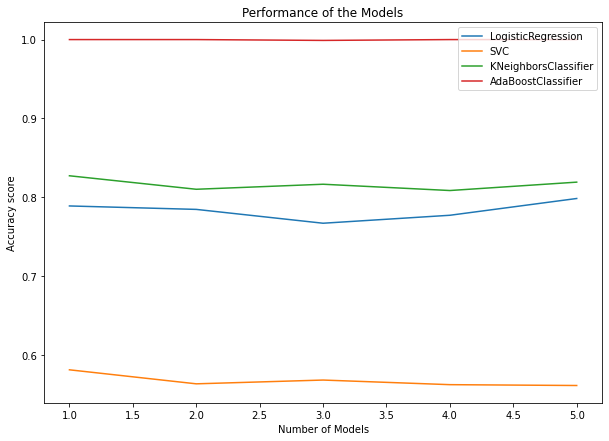

In [18]:
fig = plt.figure(figsize=(10, 7))
plt.plot(range(1,6),base_line['All_Fold_Scores'][0], label = 'LogisticRegression');
plt.plot(range(1,6),base_line['All_Fold_Scores'][1], label = 'SVC');
plt.plot(range(1,6),base_line['All_Fold_Scores'][2], label = 'KNeighborsClassifier');
plt.plot(range(1,6),base_line['All_Fold_Scores'][3], label = 'AdaBoostClassifier');
plt.xlabel('Number of Models');
plt.ylabel('Accuracy score');
plt.title('Performance of the Models')
plt.legend()
plt.show()

### BaselineModel Scores Observations:
- **All most all Ensembling techniques doing a great job upon this model as it is fact that our Target variable itself was made with some rule based criterias. But still there can be alot of problems with the Boosting models like Overfitting**
- **For Now This will definitely tell us that there are no linear boundaries between the classes but let us proceed further so that we can visualize the model boundary and see whether there are linear boundaries or not.**

# Utility Functions
- All Required Functions for making plots and other things

In [19]:
def recall_scores(true, pred):
    return recall_score(true, pred)

recall =  make_scorer(recall_scores)

In [20]:
def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

In [21]:
def plotConfusionMatrix(X_test, y_test, classes_to_keep, clf):
    """
    Description: Plot confusion matrix
    """
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        fig = plt.figure(figsize=(10,10))
        disp = plot_confusion_matrix(clf, np.array(X_test), y_test,
                                     display_labels=classes_to_keep,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()

In [22]:
def Generate_K_best_curve(model, cv_fold, function, X_train, Y, scoring_func):
      # Model: The Model that can be used as an estimator to generate CV score.
      # cv_fold: int type indicates number of folds.
      # num_feats_total: Total number of features.
      # function: A function that estimates the relation between features.
      # X_train: Training Set.
      # Y : Target variable.
      # scoring_function: Custom_metric

    num_feats_total = X_train.shape[1]
    k_nums=list(range(1,int(num_feats_total)))
    scores=[]
    for ks in k_nums:
        kbest = SelectKBest(function, k=ks).fit_transform(X_train,Y)
        accuracies=cross_val_score(estimator=model,X=kbest,y=Y,cv=cv_fold, scoring=scoring_func)
        score=accuracies.mean()
        print(f'For {ks} score is {score}')
        scores.append(score)

    fig=plt.figure(figsize=(12,10))
    plt.plot(k_nums,scores,'b')
    plt.xlabel('No. of features')
    plt.ylabel('Score')
    #return scores

In [23]:
def Imp_feats_kbest(n_feats, function, X_train, Y):
    feat_selector = SelectKBest(function, k=n_feats)
    feat_selector.fit(X_train, Y)
    kbestcols = feat_selector.get_support(indices=True)
    imp_features = X_train.iloc[:,kbestcols].columns
    return imp_features

In [24]:
def plot_ROC_Curve(pred_probas, test_y, model_name):
    ns_probs = [0 for _ in range(len(pred_probas))]
    ns_auc = roc_auc_score(test_y, ns_probs)
    lr_auc = roc_auc_score(test_y, pred_probas[:, 1])
    ns_fpr, ns_tpr, _ = roc_curve(test_y, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(test_y, pred_probas[:, 1])
    print(f'ROC_AUC Score = {lr_auc}')
    fig=plt.figure(figsize=(15,9))
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='model_name')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Model ROC_AUC')
    plt.legend()
    plt.show()

In [25]:
def plot_caliberative_curve(test_y,pred_y):
    """
    Description : Calibration curve tells you how much off are the probabilities returned by the model
    from the ideal frequentist probabilities
    
    Parameter : test data, predicted data
    
    Output: caliberative curve  
    """
    plt.rcParams.update({'font.size': 10})
    frac_of_positives, pred_prob = calibration_curve(test_y,pred_y[:,-1], n_bins=10)
    sns.lineplot(x=pred_prob, y=frac_of_positives)
    plt.plot([0,1],[0,1])
    plt.grid(linestyle='-', linewidth=0.2)
    plt.title("Probability vs Fraction of Positives")
    xlabel = plt.xlabel("Probability of positive")
    ylabel = plt.ylabel("Fraction of positives")
    ticks = [0, 0.2, 0.4, 0.6, 0.8, 1]
    xticks = plt.xticks(ticks)
    yticks = plt.yticks(ticks)

# Feature Engineering

## Feature Generation

- There is no requirement of feature generation for this process as of it is already 

## Feature Selection
- We will be using a Statistical Feature selection Method like KBest.
### What is KBest?
- Feature selection is a technique where we choose those features in our data that contribute most to the target variable. In other words we choose the best predictors for the target variable.
- The SelectKBest class just scores the features using a function (in this case f_classif but could be others) and then "removes all but the k highest scoring features".
- So its kind of a wrapper, the important thing here is the function you use to score the features.
- We will be using **f-Classif** as our Function to calculate the dependencies.
- **F-Classif:**
    - Used only for categorical targets.
    - Based on the Analysis of Variance (ANOVA) statistical test.
    - We will be applying ANOVA test between the Independent featues and the categorical target variable.

# Best Model + Fine Tuning

## Logistic Regression
- Let us firstly choose Logistic Regression which is giving around 100% score with 4 features. Lets tune this and see whether it is has the stability for cross validation.

For 1 score is 0.8776039860123079
For 2 score is 0.8776039860123079
For 3 score is 0.8776039860123079
For 4 score is 0.8776039860123079
For 5 score is 0.8441857928503957
For 6 score is 0.8583894520760117
For 7 score is 0.8573458288885544
For 8 score is 0.8717549841514998
For 9 score is 0.86340141752999
For 10 score is 0.8847108330442863
For 11 score is 0.8959943543126899
For 12 score is 0.8943215903909879
For 13 score is 0.8872182337375627
For 14 score is 0.8588148419622035
For 15 score is 0.8427281235070451
For 16 score is 0.8590244828240653
For 17 score is 0.8487898203109492
For 18 score is 0.8431364977977893
For 19 score is 0.8673599431068295
For 20 score is 0.8399993019242894
For 21 score is 0.9295979738352498
For 22 score is 0.8848945142156573
For 23 score is 0.8715379262352123
For 24 score is 0.9331553240271114
For 25 score is 0.9266835077431865
For 26 score is 0.8155553083204081
For 27 score is 0.8203537062366519
For 28 score is 0.8226514660680667
For 29 score is 0.8285089757265

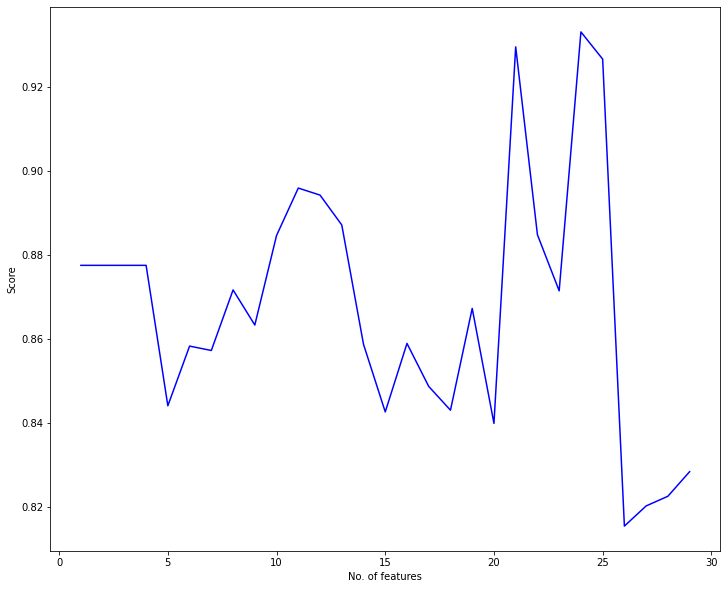

In [26]:
Generate_K_best_curve(LogisticRegression(),5, f_classif, predictors, target, recall)

In [30]:
LR_kbest = Imp_feats_kbest(21,f_classif,predictors,target)

In [31]:
LR_kbest

Index(['Single_Order', '2020', '2021', 'Churn_Rule_year_wise',
       'Churn_Rule_avg_cycle', 'Median_Days', '3_years_cycle',
       'NumQtrsPerOrder', 'OrderChannel_NonDigital',
       'OrderChannel_EProcurement', 'Recency', 'RFM_Score',
       'Average_years_taken_per order', 'Orders year wise',
       'FirstOrderedDate_Year', 'FirstOrderedDate_Month',
       'FirstOrderedDate_Week', 'LastOrderedDate_Year',
       'LastOrderedDate_Month', 'LastOrderedDate_Week', 'LastOrderedDate_Day'],
      dtype='object')

- **21 Features** giving us the optium results here.

In [211]:
C_values = np.linspace(0.001,0.05,50) # Regularization paramter : Controls overfitting
train_scores = []
kfold_values = []
test_scores = []
for c_value in C_values:
    model = LogisticRegression(C=c_value)
    cross_score = cross_val_score(model, predictors[LR_kbest], target, cv=5).mean()
    model.fit(train_X[LR_kbest], train_y)
    train_preds=model.predict(train_X[LR_kbest])
    train_score=accuracy_score(train_y, train_preds)
    train_scores.append(train_score)
    test_preds = model.predict(test_X[LR_kbest])
    test_score=accuracy_score(test_y, test_preds)
    test_scores.append(test_score)
    print(f'For C value:{c_value} 5 fold score is {cross_score}')
    kfold_values.append(cross_score)

For C value:0.001 5 fold score is 0.8832524656619072
For C value:0.002 5 fold score is 0.8965472240779953
For C value:0.003 5 fold score is 0.9345459332148154
For C value:0.004 5 fold score is 0.9141119087790021
For C value:0.005 5 fold score is 0.8920797617564797
For C value:0.006 5 fold score is 0.9186849048271488
For C value:0.007 5 fold score is 0.9273056628129496
For C value:0.008 5 fold score is 0.9004897353730481
For C value:0.009000000000000001 5 fold score is 0.9352916897851958
For C value:0.010000000000000002 5 fold score is 0.9294415318243068
For C value:0.011 5 fold score is 0.9129428283491672
For C value:0.012 5 fold score is 0.92348153725952
For C value:0.013000000000000001 5 fold score is 0.9091102102748179
For C value:0.014000000000000002 5 fold score is 0.9402963323632987
For C value:0.015 5 fold score is 0.9339104095659756
For C value:0.016 5 fold score is 0.9385892224247845
For C value:0.017 5 fold score is 0.8898454361192576
For C value:0.018000000000000002 5 fold s

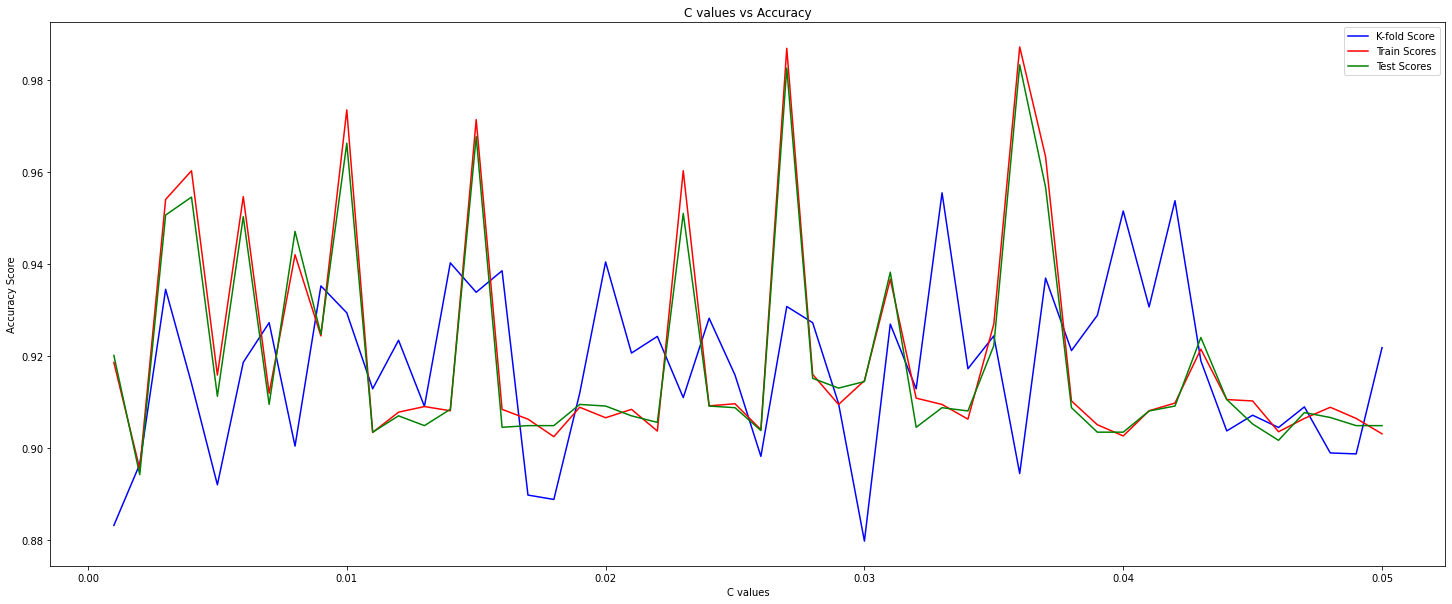

In [212]:
fig = plt.figure(figsize=(25, 10))
plt.plot(C_values, kfold_values, 'b', label='K-fold Score');
plt.plot(C_values, train_scores, 'r', label='Train Scores');
plt.plot(C_values, test_scores, 'g', label='Test Scores');
plt.xlabel('C values');
plt.ylabel('Accuracy Score');
plt.title('C values vs Accuracy');
plt.legend();

- **C value as 0.015** looks like a good value for bias variance tradeof.

### Model Boundaries

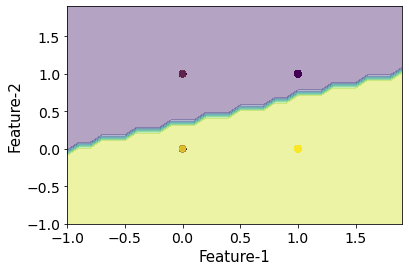

In [213]:
plt.figure
plot_decision_boundaries(predictors[kbest], target, LogisticRegression);

### Dimensionality Reduction

In [178]:
pca = PCA(2)
pca.fit(predictors)
pca_data = pca.transform(predictors)
print(pca.explained_variance_ratio_.sum())
pca_df = pd.DataFrame(data=pca_data, columns=['pca1','pca2'])
pca_df['Target']= target

0.9999949469358628


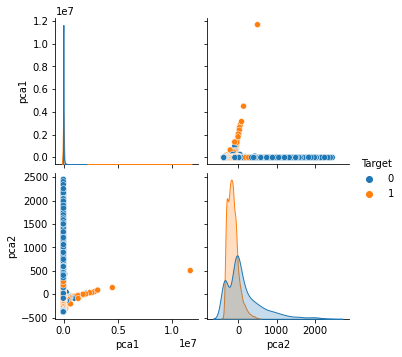

In [179]:
sns.pairplot(pca_df, hue='Target');

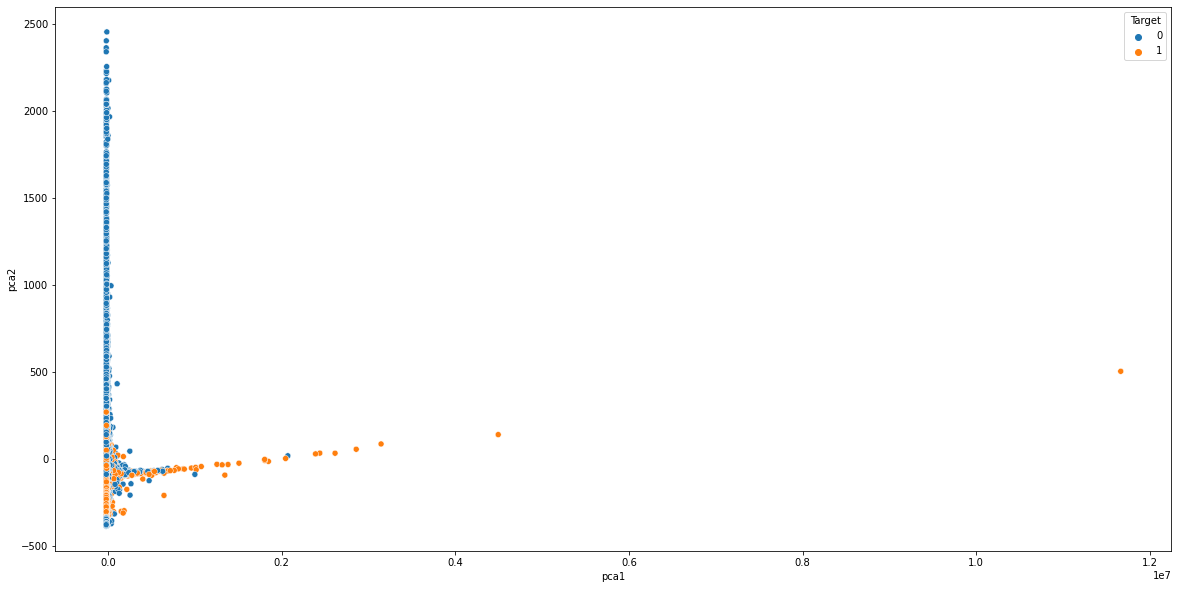

In [180]:
fig = plt.figure(figsize=(20,10))
sns.scatterplot(x='pca1',y='pca2',data=pca_df, hue='Target');

In [43]:
train_X.columns

Index(['Single_Order', '2019', '2020', '2021', 'Churn_Rule_year_wise',
       'Churn_Rule_avg_cycle', 'Median_Days', '3_years_cycle',
       'TotalOrderNumber', 'NumQtrsPerOrder', 'OrderChannel_NonDigital',
       'OrderChannel_EProcurement', 'OrderChannel_ECommerce', 'Recency',
       'Frequency', 'Monetary', 'RFM_Score', 'CountryCode',
       'Average_years_taken_per order', 'Orders year wise',
       'FirstOrderedDate_Year', 'FirstOrderedDate_Month',
       'FirstOrderedDate_Week', 'FirstOrderedDate_Day',
       'FirstOrderedDate_Dayofweek', 'LastOrderedDate_Year',
       'LastOrderedDate_Month', 'LastOrderedDate_Week', 'LastOrderedDate_Day',
       'LastOrderedDate_Dayofweek'],
      dtype='object')

In [62]:
final_Logistic_Model = LogisticRegression(C=0.030)
final_Logistic_Model.fit(train_X[LR_kbest], train_y)

LogisticRegression(C=0.03)

In [63]:
print('train accuracy',recall_score(final_Logistic_Model.predict(train_X[LR_kbest]),train_y))
print('test accuracy',recall_score(final_Logistic_Model.predict(test_X[LR_kbest]),test_y))


train accuracy 0.9450838539953963
test accuracy 0.9534023668639053


In [64]:
LR_y_pred = final_Logistic_Model.predict_proba(test_X[LR_kbest])
#LR_y_pred[:]

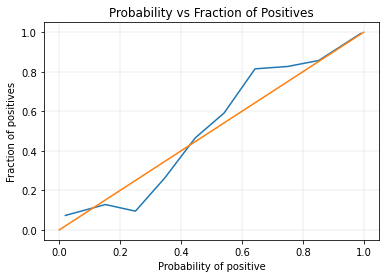

In [65]:
plot_caliberative_curve(test_y,LR_y_pred)

- Calibration curve tells you how much off are the probabilities returned by the model from the ideal frequentist probabilities

- Ideally, all points should be ***on the diagonal***. That would mean the model is ***perfectly calibrated*** and its probability estimates are trustworthy.In this Blue line is approximate to diagonal .

- Training a calibration model requires having a separate validation set or performing cross-validation to avoid overfitting.

- As ***More features*** contributing to the ***model*** then more the chances of the calliberative curve to ***become diagonal*** 
  and then it will justify our probability score more 
- If we are increassing ***Regularization parameter*** then it is also ending somewhere towards diagonal but in that case overfitting problem could rise . But after increasing the regularization parameter then at some point it
  will move away from the diagonal

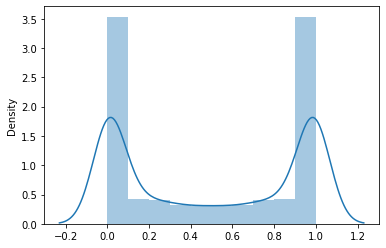

In [107]:
sns.distplot(LR_y_pred);

ROC_AUC Score = 0.9944928954416832


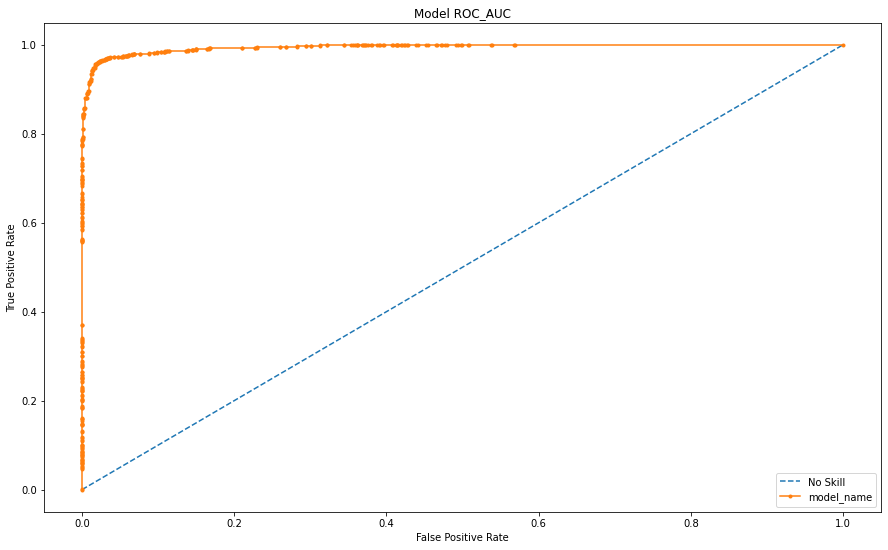

In [310]:
plot_ROC_Curve(LR_y_pred, test_y, 'Logistic')

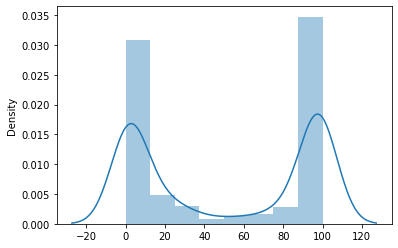

In [344]:
#sns.distplot(proba_churn);
#showing extreme behaviour 
#tune probabilities , by transforming it Refer:- sklearn docs 


Confusion matrix, without normalization
[[1323   22]
 [  69 1405]]
Normalized confusion matrix
[[0.98 0.02]
 [0.05 0.95]]


<Figure size 720x720 with 0 Axes>

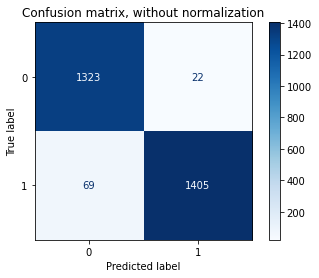

<Figure size 720x720 with 0 Axes>

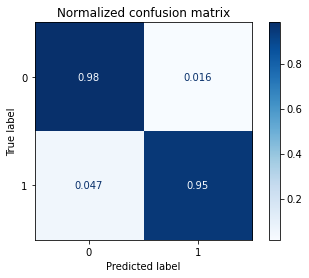

In [227]:
plotConfusionMatrix(test_X[LR_kbest], test_y, [0,1], final_Logistic_Model)

In [230]:
print(classification_report(LR_y_pred,test_y))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1392
           1       0.95      0.98      0.97      1427

    accuracy                           0.97      2819
   macro avg       0.97      0.97      0.97      2819
weighted avg       0.97      0.97      0.97      2819



## KNeighbors
- Let us choose KNeighbors model as it is giving around 94% score with just use of 7 features.

For 1 score is 0.8557917294169602
For 2 score is 0.8557917294169602
For 3 score is 0.8557917294169602
For 4 score is 0.8434488127455755
For 5 score is 0.8831429121420402
For 6 score is 0.9063446491456524
For 7 score is 0.9058125077848109
For 8 score is 0.9058125077848109
For 9 score is 0.9068769603569123
For 10 score is 0.9319943269960256
For 11 score is 0.9307171650832833
For 12 score is 0.914965916682708
For 13 score is 0.9142207828971951
For 14 score is 0.9158169238956892
For 15 score is 0.915603988087824
For 16 score is 0.9154976051091006
For 17 score is 0.9147526977908121
For 18 score is 0.91400784708933
For 19 score is 0.8793127852071609
For 20 score is 0.8733525641751498
For 21 score is 0.8746294996206675
For 22 score is 0.874735939216197
For 23 score is 0.8747359958330032
For 24 score is 0.8749489316408683
For 25 score is 0.8743104639181094
For 26 score is 0.8107757634776306
For 27 score is 0.8106693804989072
For 28 score is 0.8106694371157135
For 29 score is 0.8089664602040469

[0.8557917294169602,
 0.8557917294169602,
 0.8557917294169602,
 0.8434488127455755,
 0.8831429121420402,
 0.9063446491456524,
 0.9058125077848109,
 0.9058125077848109,
 0.9068769603569123,
 0.9319943269960256,
 0.9307171650832833,
 0.914965916682708,
 0.9142207828971951,
 0.9158169238956892,
 0.915603988087824,
 0.9154976051091006,
 0.9147526977908121,
 0.91400784708933,
 0.8793127852071609,
 0.8733525641751498,
 0.8746294996206675,
 0.874735939216197,
 0.8747359958330032,
 0.8749489316408683,
 0.8743104639181094,
 0.8107757634776306,
 0.8106693804989072,
 0.8106694371157135,
 0.8089664602040469]

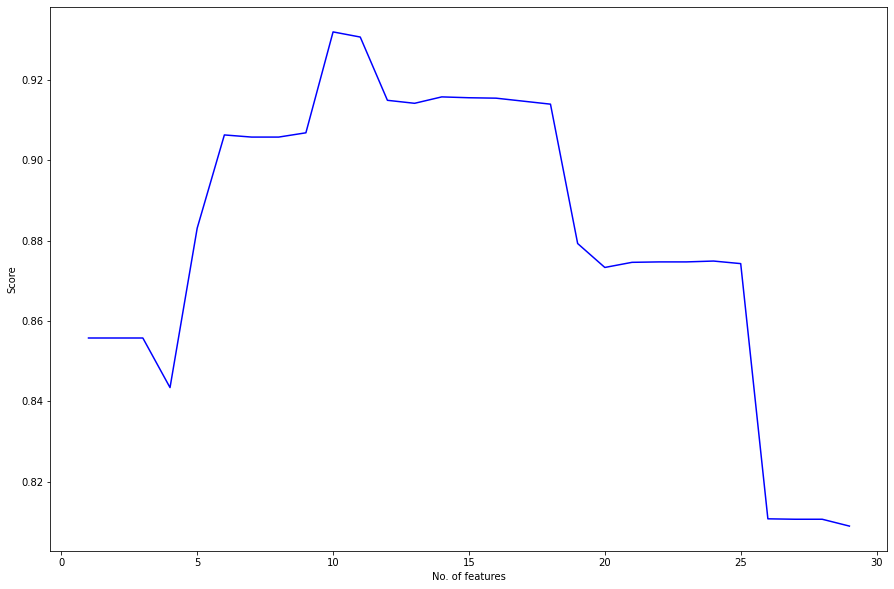

In [158]:
Generate_K_best_curve(KNeighborsClassifier(),5, f_classif, predictors, target)

In [181]:
KNN_kbest = Imp_feats_kbest(20,f_classif,predictors,target)

In [165]:
n_neighbor_values = range(2,100)
train_scores = []
kfold_values = []
test_scores = []
for n_value in n_neighbor_values:
    model = KNeighborsClassifier(n_neighbors=n_value)
    cross_score = cross_val_score(model, predictors[KNN_kbest], target, cv=5).mean()
    model.fit(train_X[KNN_kbest], train_y)
    train_preds=model.predict(train_X[KNN_kbest])
    train_score=accuracy_score(train_y, train_preds)
    train_scores.append(train_score)
    test_preds = model.predict(test_X[KNN_kbest])
    test_score=accuracy_score(test_y, test_preds)
    test_scores.append(test_score)
    print(f'For {n_value} Neighbors 5 fold score is {cross_score}')
    kfold_values.append(cross_score)

For 2 Neighbors 5 fold score is 0.9353996014176849
For 3 Neighbors 5 fold score is 0.9350796032294226
For 4 Neighbors 5 fold score is 0.9315686818475196
For 5 Neighbors 5 fold score is 0.9307171650832833
For 6 Neighbors 5 fold score is 0.9282695073205531
For 7 Neighbors 5 fold score is 0.9282694507037469
For 8 Neighbors 5 fold score is 0.9258216797074045
For 9 Neighbors 5 fold score is 0.9246512970910287
For 10 Neighbors 5 fold score is 0.9229487164970049
For 11 Neighbors 5 fold score is 0.9237998935604045
For 12 Neighbors 5 fold score is 0.9216714979674567
For 13 Neighbors 5 fold score is 0.9231614258376457
For 14 Neighbors 5 fold score is 0.92103314347831
For 15 Neighbors 5 fold score is 0.9216715545842629
For 16 Neighbors 5 fold score is 0.9201814568636554
For 17 Neighbors 5 fold score is 0.9211394132234213
For 18 Neighbors 5 fold score is 0.9187981950562205
For 19 Neighbors 5 fold score is 0.9197558117151494
For 20 Neighbors 5 fold score is 0.9179465084415657
For 21 Neighbors 5 fol

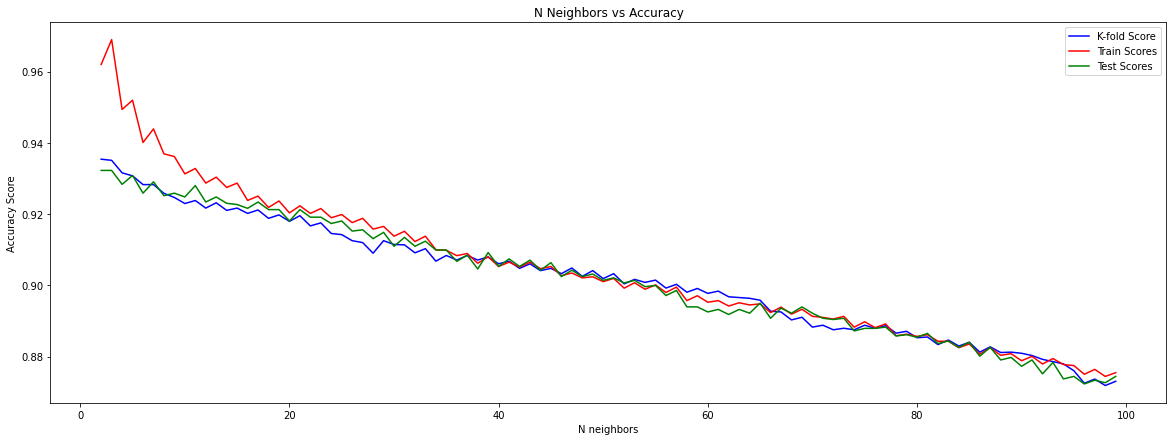

In [166]:
fig = plt.figure(figsize=(20, 7))
plt.plot(n_neighbor_values, kfold_values, 'b', label='K-fold Score');
plt.plot(n_neighbor_values, train_scores, 'r', label='Train Scores');
plt.plot(n_neighbor_values, test_scores, 'g', label='Test Scores');
plt.xlabel('N neighbors');
plt.ylabel('Accuracy Score');
plt.title('N Neighbors vs Accuracy');
plt.legend()

- Choosing 15 or 37 as N_Neighbors would be an optium paramter.

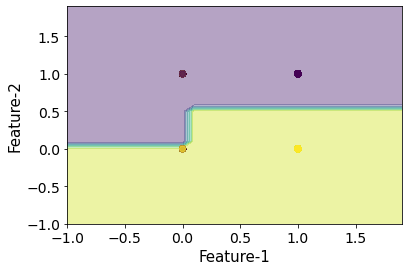

In [182]:
plt.figure
plot_decision_boundaries(predictors[kbest], target, KNeighborsClassifier);

In [182]:
final_KNN_model = KNeighborsClassifier(n_neighbors=10)
final_KNN_model.fit(train_X[KNN_kbest], train_y)

KNeighborsClassifier(n_neighbors=10)

In [183]:
KNN_y_pred = final_KNN_model.predict_proba(test_X[KNN_kbest])

In [184]:
print('train recall',recall_score(final_KNN_model.predict(train_X[KNN_kbest]),train_y))
print('test recall',recall_score(final_KNN_model.predict(test_X[KNN_kbest]),test_y))

train recall 0.9651830581478823
test recall 0.9531772575250836


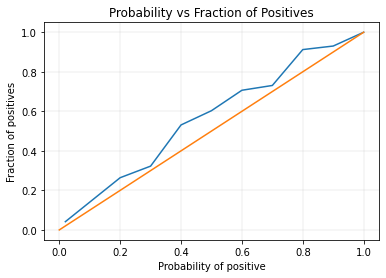

In [186]:
plot_caliberative_curve(test_y,KNN_y_pred)

- As we are decreasing our n_neighbours then calliberative curve is becoming more diagonal i.e more justifiable 
- but it will be more prone to ***overfit*** our model 
- If we increase our features then this curve is more tend towards 

<AxesSubplot:ylabel='Density'>

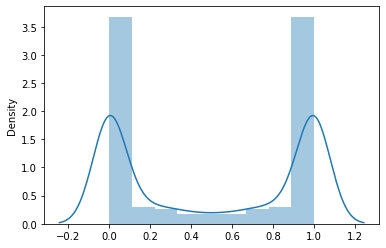

In [153]:
sns.distplot(KNN_y_pred)

#### Brier loss for calliberative curve 

For 2 Neighbors 5 fold score is 0.9353996014176849
For 3 Neighbors 5 fold score is 0.9350796032294226
For 4 Neighbors 5 fold score is 0.9315686818475196
For 5 Neighbors 5 fold score is 0.9307171650832833
For 6 Neighbors 5 fold score is 0.9282695073205531
For 7 Neighbors 5 fold score is 0.9282694507037469
For 8 Neighbors 5 fold score is 0.9258216797074045
For 9 Neighbors 5 fold score is 0.9246512970910287
For 10 Neighbors 5 fold score is 0.9229487164970049
For 11 Neighbors 5 fold score is 0.9237998935604045
For 12 Neighbors 5 fold score is 0.9216714979674567
For 13 Neighbors 5 fold score is 0.9231614258376457
For 14 Neighbors 5 fold score is 0.92103314347831


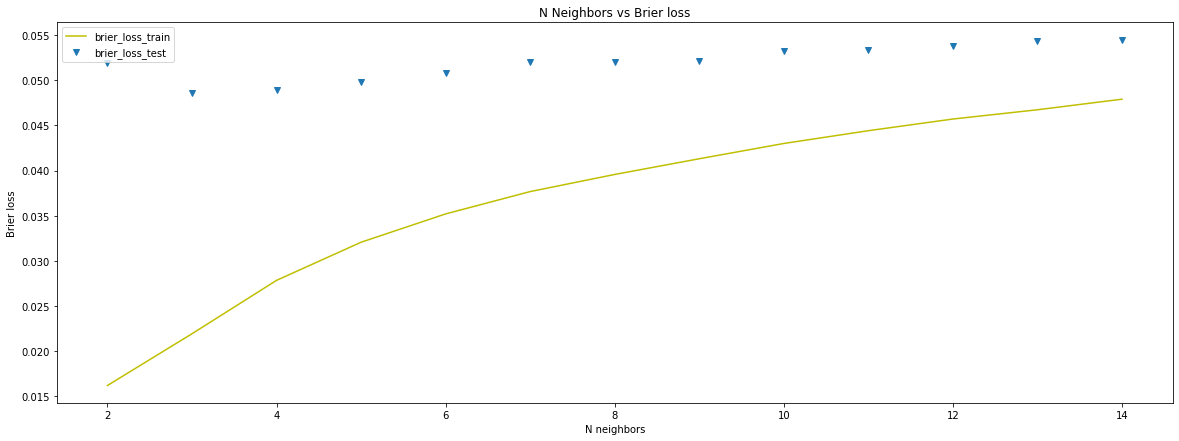

In [174]:
from sklearn.metrics import brier_score_loss

n_neighbor_values = range(2,15)
train_scores = []
kfold_values = []
test_scores = []
brier_loss_train = []
brier_loss_test= [] 
for n_value in n_neighbor_values:
    model = KNeighborsClassifier(n_neighbors=n_value)
    cross_score = cross_val_score(model, predictors[KNN_kbest], target, cv=5).mean()
    model.fit(train_X[KNN_kbest], train_y)
    train_preds=model.predict(train_X[KNN_kbest])
    train_score=accuracy_score(train_y, train_preds)
    
    
    brier_loss_train.append(brier_score_loss(train_y, model.predict_proba(train_X[KNN_kbest])[:,1]))
    
    train_scores.append(train_score)
    test_preds = model.predict(test_X[KNN_kbest])
    test_score=accuracy_score(test_y, test_preds)
    brier_loss_test.append(brier_score_loss(test_y, model.predict_proba(test_X[KNN_kbest])[:,1]))

    test_scores.append(test_score)
    print(f'For {n_value} Neighbors 5 fold score is {cross_score}')
    kfold_values.append(cross_score)
    
fig = plt.figure(figsize=(20, 7))
plt.plot(n_neighbor_values, brier_loss_train, 'y', label='brier_loss_train');
plt.plot(n_neighbor_values, brier_loss_test, 'v', label='brier_loss_test');


plt.xlabel('N neighbors');
plt.ylabel('Brier loss');
plt.title('N Neighbors vs Brier loss');
plt.legend()    


Confusion matrix, without normalization
[[1329   16]
 [ 202 1272]]
Normalized confusion matrix
[[0.99 0.01]
 [0.14 0.86]]


<Figure size 720x720 with 0 Axes>

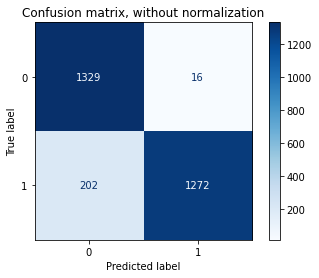

<Figure size 720x720 with 0 Axes>

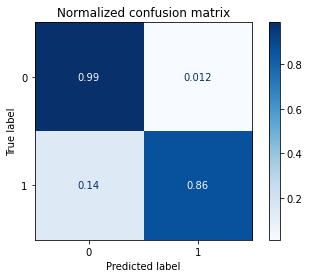

In [237]:
plotConfusionMatrix(test_X[KNN_kbest], test_y, [0,1], final_KNN_model)

In [238]:
print(classification_report(KNN_y_pred,test_y))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      1531
           1       0.86      0.99      0.92      1288

    accuracy                           0.92      2819
   macro avg       0.93      0.93      0.92      2819
weighted avg       0.93      0.92      0.92      2819



## RandomForests

In [154]:
RF_kbest = Imp_feats_kbest(9,f_classif,predictors,target)

In [193]:
max_depth = range(2,25)
train_scores = []
kfold_values = []
test_scores = []
for m_d in max_depth:
    model = RandomForestClassifier(max_depth=m_d)
    cross_score = cross_val_score(model, predictors[RF_kbest], target, cv=5).mean()
    model.fit(train_X[kbest], train_y)
    train_preds=model.predict(train_X[RF_kbest])
    train_score=accuracy_score(train_y, train_preds)
    train_scores.append(train_score)
    test_preds = model.predict(test_X[RF_kbest])
    test_score=accuracy_score(test_y, test_preds)
    test_scores.append(test_score)
    print(f'For Max_depth = {m_d}, 5 fold score is {cross_score}')
    kfold_values.append(cross_score)

For Max_depth = 2, 5 fold score is 0.9117734648353016
For Max_depth = 3, 5 fold score is 0.9140081867901667
For Max_depth = 4, 5 fold score is 0.9197555852479249
For Max_depth = 5, 5 fold score is 0.9276309263641819
For Max_depth = 6, 5 fold score is 0.930398412464756
For Max_depth = 7, 5 fold score is 0.9311434330166566
For Max_depth = 8, 5 fold score is 0.9299725408490257
For Max_depth = 9, 5 fold score is 0.9309303839751794
For Max_depth = 10, 5 fold score is 0.931036936804321
For Max_depth = 11, 5 fold score is 0.9291209674679832
For Max_depth = 12, 5 fold score is 0.9281629544914113
For Max_depth = 13, 5 fold score is 0.9263535946010213
For Max_depth = 14, 5 fold score is 0.9259279494525157
For Max_depth = 15, 5 fold score is 0.925714843794232
For Max_depth = 16, 5 fold score is 0.9261406587931562
For Max_depth = 17, 5 fold score is 0.9240120367329838
For Max_depth = 18, 5 fold score is 0.925289255262532
For Max_depth = 19, 5 fold score is 0.9249699930927496
For Max_depth = 20, 5 

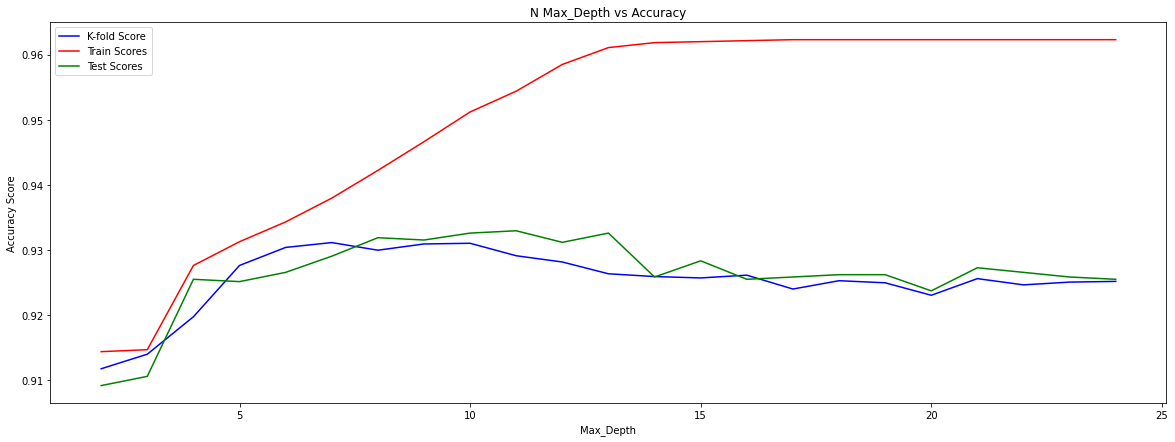

In [194]:
fig = plt.figure(figsize=(20, 7))
plt.plot(max_depth, kfold_values, 'b', label='K-fold Score');
plt.plot(max_depth, train_scores, 'r', label='Train Scores');
plt.plot(max_depth, test_scores, 'g', label='Test Scores');
plt.xlabel('Max_Depth');
plt.ylabel('Accuracy Score');
plt.title('Max_Depth vs Accuracy');
plt.legend()

- **Max_depth of 7** looks as a good paramter which gives an Average score of around **93%**, now lets select **max_features.**

In [196]:
max_features = range(2,9)
train_scores = []
kfold_values = []
test_scores = []
for m_f in max_features:
    model = RandomForestClassifier(max_depth=7, max_features=m_f)
    cross_score = cross_val_score(model, predictors[RF_kbest], target, cv=5).mean()
    model.fit(train_X[kbest], train_y)
    train_preds=model.predict(train_X[RF_kbest])
    train_score=accuracy_score(train_y, train_preds)
    train_scores.append(train_score)
    test_preds = model.predict(test_X[RF_kbest])
    test_score=accuracy_score(test_y, test_preds)
    test_scores.append(test_score)
    print(f'For max_features = {m_f}, 5 fold score is {cross_score}')
    kfold_values.append(cross_score)

For max_features = 2, 5 fold score is 0.9311433197830443
For max_features = 3, 5 fold score is 0.9306111218053967
For max_features = 4, 5 fold score is 0.9299724842322196
For max_features = 5, 5 fold score is 0.9302916897851958
For max_features = 6, 5 fold score is 0.9300789804445552
For max_features = 7, 5 fold score is 0.9309303839751791
For max_features = 8, 5 fold score is 0.9302918596356141


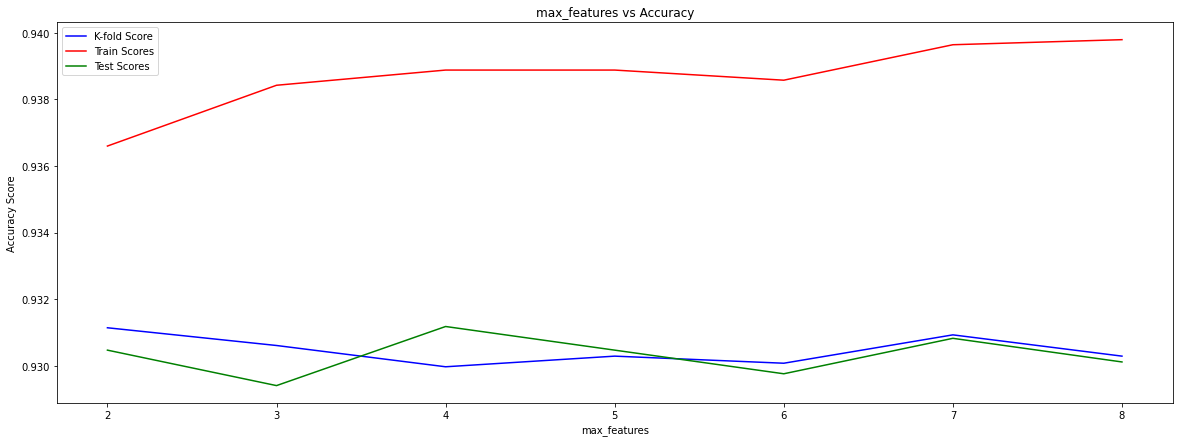

In [197]:
fig = plt.figure(figsize=(20, 7))
plt.plot(max_features, kfold_values, 'b', label='K-fold Score');
plt.plot(max_features, train_scores, 'r', label='Train Scores');
plt.plot(max_features, test_scores, 'g', label='Test Scores');
plt.xlabel('max_features');
plt.ylabel('Accuracy Score');
plt.title('max_features vs Accuracy');
plt.legend()

- Using all features would be more beneficial here.

In [221]:
final_RF_Model = RandomForestClassifier(max_depth=10)
final_RF_Model.fit(train_X[RF_kbest], train_y)

RandomForestClassifier(max_depth=10)

In [222]:
RF_y_pred = final_RF_Model.predict_proba(test_X[RF_kbest])


In [223]:
print('train recall',recall_score(final_RF_Model.predict(train_X[RF_kbest]),train_y))
print('test recall',recall_score(final_RF_Model.predict(test_X[RF_kbest]),test_y))

print('train accuracy',accuracy_score(final_RF_Model.predict(train_X[RF_kbest]),train_y))
print('test accuracy',accuracy_score(final_RF_Model.predict(test_X[RF_kbest]),test_y))


train recall 0.987597911227154
test recall 0.977645305514158
train accuracy 0.9505853732704881
test accuracy 0.9318907413976587


In [230]:
nnn_target = data['Final_Churn']
nnn_train = data[RF_kbest]


In [231]:
nnn_target

0       1
1       0
2       0
3       0
4       0
       ..
9391    0
9392    0
9393    0
9394    0
9395    0
Name: Final_Churn, Length: 9396, dtype: int64

In [238]:
finalscore_probability = final_RF_Model.predict_proba(nnn_train)
finalscore_probability[:,1]

array([0.9983908 , 0.26120169, 0.        , ..., 0.        , 0.        ,
       0.        ])

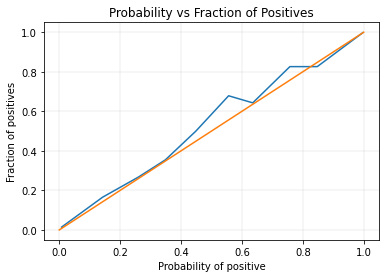

In [236]:
plot_caliberative_curve(test_y,RF_y_pred)

- As we are increasing  our max depth  then calliberative curve is becoming more diagonal i.e more justifiable.
  after some thershold of max depth it will also not work well
- It will be more prone to ***overfit*** our model as we increase our depth. So we have to choose the optimal number that is not overfitting the model as well as giving good callierated curve 

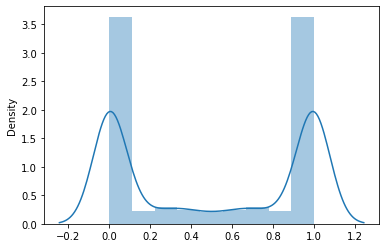

In [172]:
sns.distplot(RF_y_pred);

Confusion matrix, without normalization
[[1313   32]
 [ 163 1311]]
Normalized confusion matrix
[[0.98 0.02]
 [0.11 0.89]]


<Figure size 720x720 with 0 Axes>

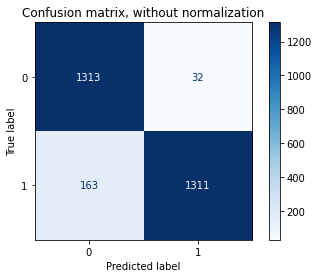

<Figure size 720x720 with 0 Axes>

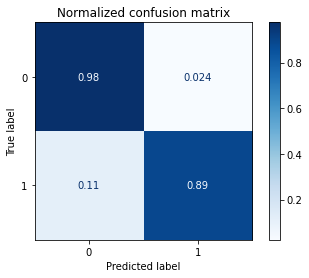

In [244]:
plotConfusionMatrix(test_X[RF_kbest], test_y, [0,1], final_RF_Model)

In [245]:
print(classification_report(RF_y_pred,test_y))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1476
           1       0.89      0.98      0.93      1343

    accuracy                           0.93      2819
   macro avg       0.93      0.93      0.93      2819
weighted avg       0.93      0.93      0.93      2819



In [241]:
client_data = data[['accountsapid' , '2019' , '2020', '2021' , 'Churn_Rule_year_wise', 'Churn_Rule_avg_cycle', 'Final_Churn']]
client_data['Final_churn_ProbabilityScore'] = finalscore_probability[:,1]

,accountsapid,2019,2020,2021,Churn_Rule_year_wise,Churn_Rule_avg_cycle,Final_Churn
0,17876.0,1,0,0,1,2,1
1,17882.0,1,1,1,0,1,0
2,17985.0,1,1,1,0,1,0
3,22286.0,1,1,1,0,1,0
4,19780.0,1,1,1,0,1,0
...,...,...,...,...,...,...,...
9391,1022470.0,0,0,1,0,0,0
9392,1023101.0,0,0,1,0,0,0
9393,1023221.0,0,0,1,0,0,0
9394,1023287.0,0,0,1,0,0,0


In [226]:
data['accountsapid']

0         17876.0
1         17882.0
2         17985.0
3         22286.0
4         19780.0
          ...    
9391    1022470.0
9392    1023101.0
9393    1023221.0
9394    1023287.0
9395    1023554.0
Name: accountsapid, Length: 9396, dtype: float64

In [ ]:
finalscore_probability[:,1]

In [240]:
data

,accountsapid,Single_Order,2019,2020,2021,Churn_Rule_year_wise,Churn_Rule_avg_cycle,Median_Days,3_years_cycle,Final_Churn,...,FirstOrderedDate_Year,FirstOrderedDate_Month,FirstOrderedDate_Week,FirstOrderedDate_Day,FirstOrderedDate_Dayofweek,LastOrderedDate_Year,LastOrderedDate_Month,LastOrderedDate_Week,LastOrderedDate_Day,LastOrderedDate_Dayofweek
0,17876.0,0,1,0,0,1,2,73.0,219.0,1,...,2019,9,36,3,1,2019,11,46,15,4
1,17882.0,0,1,1,1,0,1,20.0,60.0,0,...,2019,1,5,29,1,2021,6,22,4,4
2,17985.0,0,1,1,1,0,1,174.0,522.0,0,...,2019,2,6,7,3,2021,6,24,18,4
3,22286.0,0,1,1,1,0,1,21.0,63.0,0,...,2019,1,3,17,3,2021,5,20,20,3
4,19780.0,0,1,1,1,0,1,42.0,126.0,0,...,2019,3,9,1,4,2021,3,13,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9391,1022470.0,1,0,0,1,0,0,0.0,0.0,0,...,2021,3,12,26,4,2021,3,12,26,4
9392,1023101.0,1,0,0,1,0,0,0.0,0.0,0,...,2021,4,17,30,4,2021,4,17,30,4
9393,1023221.0,1,0,0,1,0,0,0.0,0.0,0,...,2021,5,18,7,4,2021,5,18,7,4
9394,1023287.0,1,0,0,1,0,0,0.0,0.0,0,...,2021,5,19,11,1,2021,5,19,11,1
